In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\excelr assignments\clustering\EastWestAirlines.xlsx.csv")

In [3]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [7]:
df.rename(columns={'ID#':'ID', 'Award?':'Award'},inplace=True)

In [8]:
df1 = df.drop(['ID','Award'], axis=1)

In [9]:
df1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [11]:
std_df = scaler.fit_transform(df1)

In [12]:
std_df.shape

(3999, 10)

KMEANS

In [16]:
from sklearn.cluster import KMeans


In [17]:
from sklearn.metrics import silhouette_score
list1 = [2,3,4,5,6,7,8,9,10,11]
for i in list1:
    c1 = KMeans(n_clusters=i)
    c_labels = c1.fit_predict(std_df)
    s_score= silhouette_score(std_df,c_labels)
    print('clusters=',i,'silhoutte_score=',s_score)

clusters= 2 silhoutte_score= 0.35810217583769355
clusters= 3 silhoutte_score= 0.3307256537270909
clusters= 4 silhoutte_score= 0.3323976840719353
clusters= 5 silhoutte_score= 0.34354010082009934
clusters= 6 silhoutte_score= 0.36004222264324875
clusters= 7 silhoutte_score= 0.26071396408089126
clusters= 8 silhoutte_score= 0.27594095370709204
clusters= 9 silhoutte_score= 0.27496659307811666
clusters= 10 silhoutte_score= 0.27057734035082887
clusters= 11 silhoutte_score= 0.2691367762691596


In [18]:
# silhoutte_score is max for 6 number of clusters

Text(0, 0.5, 'Inertia')

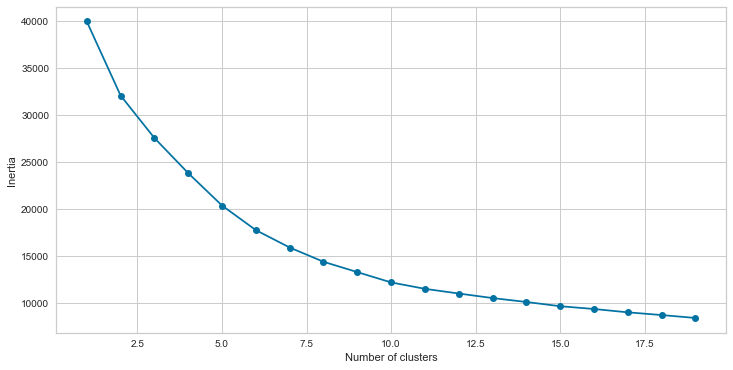

In [24]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans( n_clusters = cluster, init='k-means++')
    kmeans.fit(std_df)
    SSE.append(kmeans.inertia_)
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [25]:
kmeans = KMeans( n_clusters = 6, init='k-means++')
kmeans.fit(std_df)
pred = kmeans.predict(std_df)

In [26]:
frame1 = pd.DataFrame(std_df)
frame1['cluster'] = pred
frame1['cluster'].value_counts()

1    1446
0    1175
5    1169
3     151
2      43
4      15
Name: cluster, dtype: int64

Hierarchial

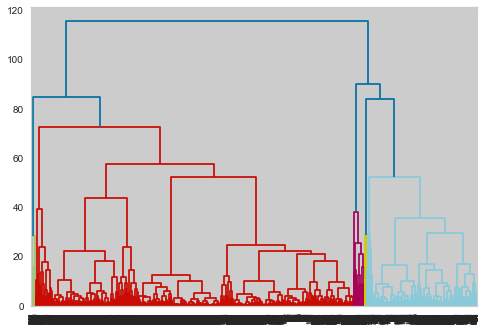

In [48]:
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_data = linkage(std_df, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()

In [33]:
from sklearn.cluster import AgglomerativeClustering

In [49]:
list2 = [2,3,4,5,6,7,8,9,10,11]
for i in list2:
    hc = AgglomerativeClustering(n_clusters=i)
    c_labels1 = hc.fit_predict(std_df)
    s_score1= silhouette_score(std_df,c_labels1)
    print('clusters=',i,'silhoutte_score=',s_score1*100)

clusters= 2 silhoutte_score= 32.50783169425001
clusters= 3 silhoutte_score= 31.619409882758315
clusters= 4 silhoutte_score= 33.50233247024554
clusters= 5 silhoutte_score= 32.70181658948408
clusters= 6 silhoutte_score= 34.71326853154005
clusters= 7 silhoutte_score= 24.349268923793293
clusters= 8 silhoutte_score= 20.64418844275397
clusters= 9 silhoutte_score= 22.070325657753013
clusters= 10 silhoutte_score= 22.55303798353131
clusters= 11 silhoutte_score= 22.809298985505155


In [40]:
#silhoutte score is max for n_clusters=6

In [55]:
hc1 = AgglomerativeClustering(n_clusters=6)
pred2 = hc1.fit_predict(std_df)

In [56]:
frame2 = pd.DataFrame(std_df)
frame2['cluster'] = pred2
frame2['cluster'].value_counts()

0    2706
1     992
2     144
5      96
3      43
4      18
Name: cluster, dtype: int64

Dbscan

In [67]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.8,min_samples=6)
dbscan.fit(std_df)

DBSCAN(eps=0.8, min_samples=6)

In [77]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(std_df)
distances, indices = nbrs.kneighbors(std_df)

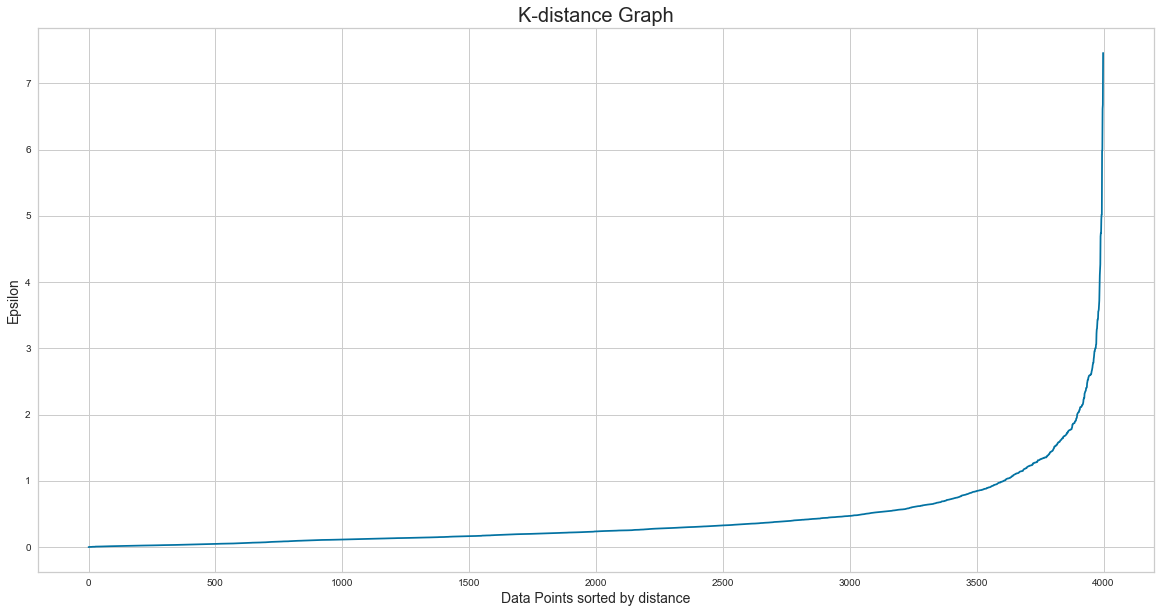

In [78]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [92]:
dbscan=DBSCAN(eps=1.5,min_samples=6)
dbscan.fit(std_df)

DBSCAN(eps=1.5, min_samples=6)

In [93]:
df['DBSCAN_opt_labels']=dbscan.labels_
df['DBSCAN_opt_labels'].value_counts()

 0    3696
-1     271
 1      22
 2      10
Name: DBSCAN_opt_labels, dtype: int64

In [84]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)